In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("gym_members_exercise_tracking_synthetic_data.csv")
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [ ]:
# check structure and missing values
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

,0
Age,10
Gender,71
Weight (kg),22
Height (m),26
Max_BPM,21
Avg_BPM,30
Resting_BPM,19
Session_Duration (hours),23
Calories_Burned,23
Workout_Type,61


In [ ]:
# convert Max_BPM to numeric
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')


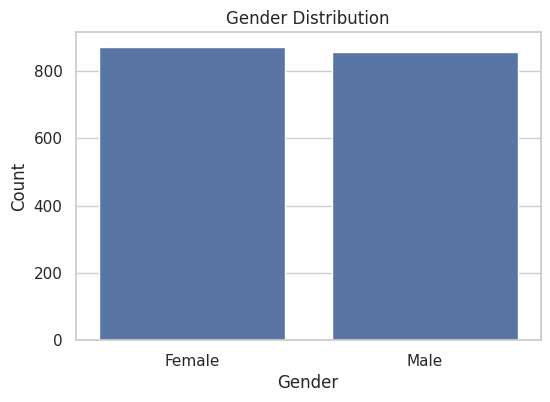

In [ ]:
# Gender Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


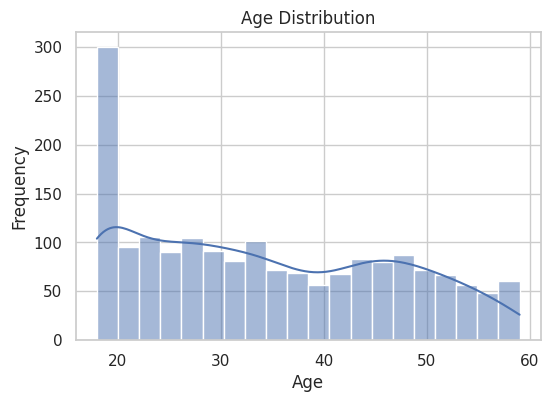

In [ ]:
# Age Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


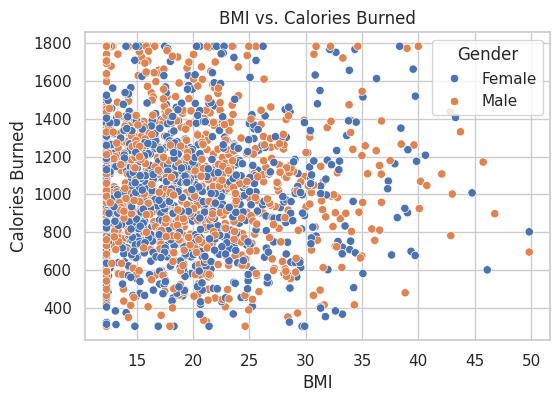

In [ ]:
# Scatterplot – BMI vs Calories
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='BMI', y='Calories_Burned', hue='Gender')
plt.title('BMI vs. Calories Burned')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.show()


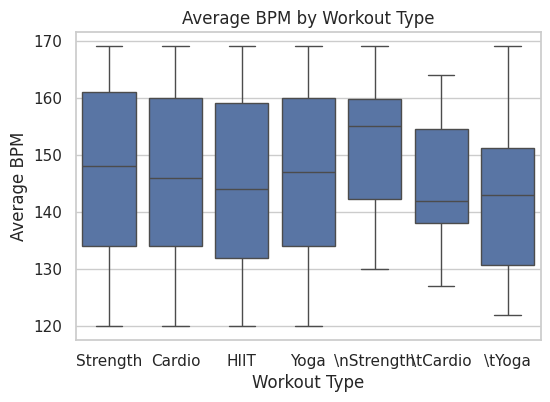

In [ ]:
# Boxplot – Avg BPM by Workout Type
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Workout_Type', y='Avg_BPM')
plt.title('Average BPM by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average BPM')
plt.show()


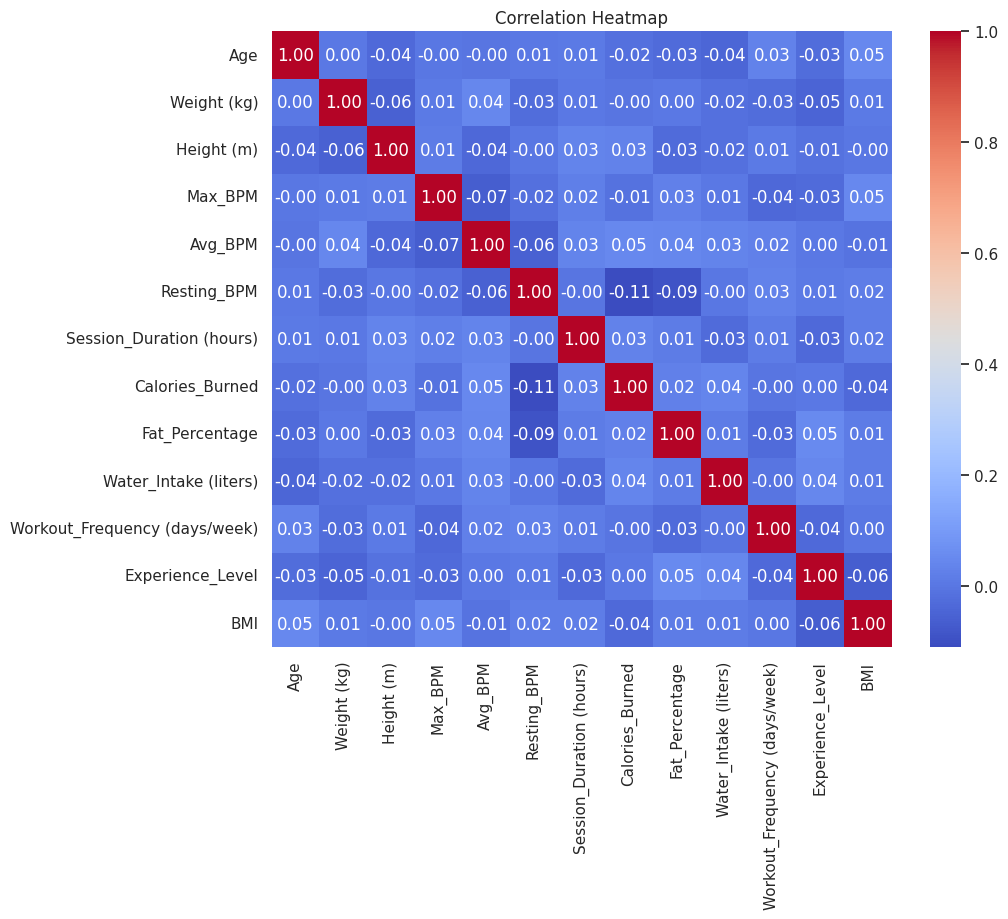

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Preprocessing
data = df.copy()
data = data.dropna(subset=['Experience_Level'])

label_encoders = {}
for col in ['Gender', 'Workout_Type']:
    le = LabelEncoder()
    data[col] = data[col].astype(str)
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

num_cols = data.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

X = data.drop(columns=['Experience_Level'])
y = data['Experience_Level'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Class balance:\n", y_train.value_counts(normalize=True))


Train shape: (1394, 14)
Test shape: (349, 14)
Class balance:
 Experience_Level
2    0.415352
1    0.383788
3    0.200861
Name: proportion, dtype: float64


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
